In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


In [4]:
def grid(x0,y0,B, Num_base_points):
    '''returns two 2-Dimensional arrays representing the X and Y coordinates of all the points in the regular
    square grid with centre (x0,y0), side 2B and Num_base_points^2 points.
    '''
    x = np.linspace(x0 - B, x0 + B, Num_base_points)
    y = np.linspace(y0 - B, y0 + B, Num_base_points) 
    
    return np.meshgrid(x, y, indexing='xy') # x and y coordinates of the mesh, with this ordering, each is accessed from the
                                            #  top left corner, first entry going down and second to the right 

grid(x0,y0,B, Num_base_points) consists of two arrays each of (Num_base_points) x (Num_base_points) entries. Example:

In [5]:
grid(0,0,2,9)

[array([[-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ],
        [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ],
        [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ],
        [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ],
        [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ],
        [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ],
        [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ],
        [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ],
        [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]]),
 array([[-2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
        [ 1. ,  1. ,  1. ,  1. ,  1. ,

In [6]:
grid(0,0,2,9)[0][4,6], grid(0,0,2,9)[1][4,6]

(1.0, 0.0)

In [7]:
np.shape(grid(0,0,2,9))

(2, 9, 9)

Observe that the grid spacing (our epsilon) is

epsilon = 2 * B/(Num_base_points - 1). 



In [8]:
def function(x, y):
    '''Define the polynomial function f(x, y) here.'''
    return  x**2 + y**2 -1 #x**2 + y**2 -1   #examples:x**2 + y**2 -1,  y*x**2 + 3*y+ x - 4 #x**2 + y**2 -1 

In [9]:
def gradient(f):
    '''Calculates the symbolic gradient of the function f.'''
    x, y = sp.symbols('x y')
    f_sym = f(x, y)
    df_dx = sp.diff(f_sym, x)
    df_dy = sp.diff(f_sym, y)
    return sp.lambdify((x, y), df_dx), sp.lambdify((x, y), df_dy)

In [10]:
def norm_f_on_grid(grid):
    """returns a 2-Dimensional array with the absolute value of the function on the points in the 
    (Num_base_points) x (Num_base_points) mesh."""
    return np.absolute(  function(grid[0],grid[1]) )

In [11]:
np.shape(norm_f_on_grid(grid(0,0,2,9)))

(9, 9)

In [12]:
def norm_grad_on_grid(grid):
    """returns a 2-Dimensional array with the value of the L_1 norm of gradient of the function on the points in the 
    (Num_base_points) x (Num_base_points) mesh."""
    df_dx_func, df_dy_func = gradient(function)
    df_dx = df_dx_func(grid[0],grid[1])
    df_dy = df_dy_func(grid[0],grid[1])
    return np.absolute(df_dx) + np.absolute(df_dy)

We can plot them:

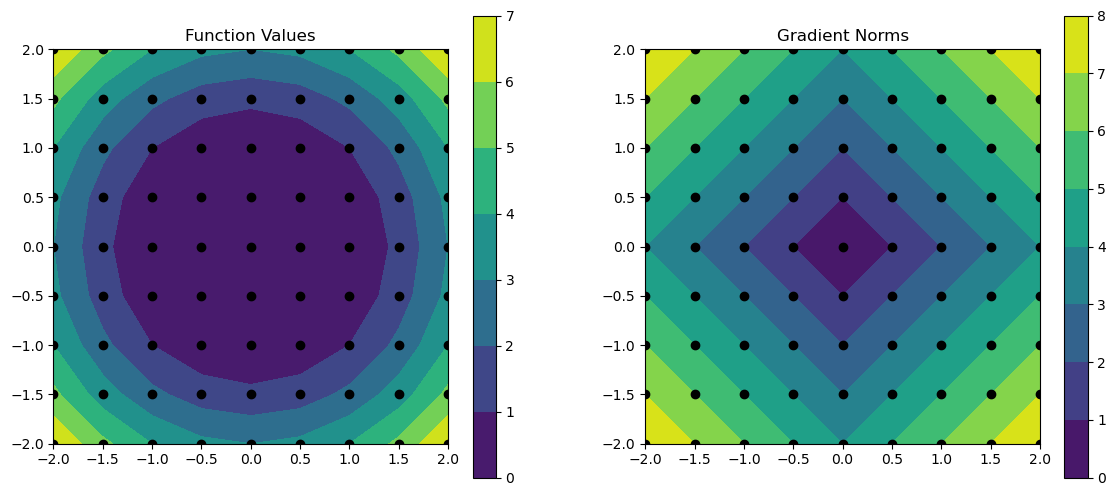

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

c1 = ax[0].contourf(grid(0,0,2,9)[0],grid(0,0,2,9)[1], norm_f_on_grid(grid(0,0,2,9)), cmap='viridis')
fig.colorbar(c1, ax=ax[0])
ax[0].scatter(grid(0,0,2,9)[0], grid(0,0,2,9)[1], marker='o', color='k')
ax[0].set_title('Function Values')
ax[0].set_aspect('equal')

c2 = ax[1].contourf(grid(0,0,2,9)[0],grid(0,0,2,9)[1], norm_grad_on_grid(grid(0,0,2,9)), cmap='viridis')
fig.colorbar(c2, ax=ax[1])
ax[1].scatter(grid(0,0,2,9)[0], grid(0,0,2,9)[1], marker='o', color='k')
ax[1].set_title('Gradient Norms')
ax[1].set_aspect('equal')

plt.show()

We can create an array with 1s in the entries where the norm of f and the norm of the grad are less than atol. The 1s represent the points in the grid where the function is closed to zero and its gradient is small (given by atol) these are the `problematic-points', they are closed to the zero set and its gradient is small.

In [14]:
s = np.where( np.isclose(norm_f_on_grid(grid(0,0,2,9)),0,atol=3)
             & np.isclose(norm_grad_on_grid(grid(0,0,2,9)),0, atol=3) ,1,0 )
print(s)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


similarly we can create two 2D arrays with the value of the x and y coords when the conditions are satisfied,

In [15]:
t = np.where( np.isclose(norm_f_on_grid(grid(0,0,2,9)),0,atol=3)
             & np.isclose(norm_grad_on_grid(grid(0,0,2,9)),0, atol=3) ,grid(0,0,2,9),88 )
print(t)


[[[88.  88.  88.  88.  88.  88.  88.  88.  88. ]
  [88.  88.  88.  88.   0.  88.  88.  88.  88. ]
  [88.  88.  88.  -0.5  0.   0.5 88.  88.  88. ]
  [88.  88.  -1.  -0.5  0.   0.5  1.  88.  88. ]
  [88.  -1.5 -1.  -0.5  0.   0.5  1.   1.5 88. ]
  [88.  88.  -1.  -0.5  0.   0.5  1.  88.  88. ]
  [88.  88.  88.  -0.5  0.   0.5 88.  88.  88. ]
  [88.  88.  88.  88.   0.  88.  88.  88.  88. ]
  [88.  88.  88.  88.  88.  88.  88.  88.  88. ]]

 [[88.  88.  88.  88.  88.  88.  88.  88.  88. ]
  [88.  88.  88.  88.  -1.5 88.  88.  88.  88. ]
  [88.  88.  88.  -1.  -1.  -1.  88.  88.  88. ]
  [88.  88.  -0.5 -0.5 -0.5 -0.5 -0.5 88.  88. ]
  [88.   0.   0.   0.   0.   0.   0.   0.  88. ]
  [88.  88.   0.5  0.5  0.5  0.5  0.5 88.  88. ]
  [88.  88.  88.   1.   1.   1.  88.  88.  88. ]
  [88.  88.  88.  88.   1.5 88.  88.  88.  88. ]
  [88.  88.  88.  88.  88.  88.  88.  88.  88. ]]]


we can alternatively leave it with True and False values and trasnform the True values into a list. 

In [16]:
l = np.where( np.isclose(norm_f_on_grid(grid(0,0,2,9)),0,atol=3)
             & np.isclose(norm_grad_on_grid(grid(0,0,2,9)),0, atol=3) )
print(l)
np.vstack(l).T.tolist()

(array([1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6,
       6, 6, 7]), array([4, 3, 4, 5, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 3,
       4, 5, 4]))


[[1, 4],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [4, 5],
 [4, 6],
 [4, 7],
 [5, 2],
 [5, 3],
 [5, 4],
 [5, 5],
 [5, 6],
 [6, 3],
 [6, 4],
 [6, 5],
 [7, 4]]

This list can later be transformed into coordinates by observing that with our indexing criteria, the coordinates of the grid are given by

In [17]:
grid(0,0,2,9)[0][4,6],grid(0,0,2,9)[1][4,6]

(1.0, 0.0)

In [18]:
grid(0,0,2,9)[0][4,7],grid(0,0,2,9)[1][4,7]

(1.5, 0.0)

In [20]:
init_point = [0,0]
positions = np.where( np.isclose(norm_f_on_grid(grid(init_point[0],init_point[1],B,Num_base_points)),0,atol=3)
             & np.isclose(norm_grad_on_grid(grid(init_point[0],init_point[1],B,Num_base_points)),0, atol=3) )
print(positions)
positions_pairs = np.vstack((positions[0],positions[1])).T #or np.row_stack( [positions[0],positions[1]])
print(positions_pairs)
positions_pairs.shape

(array([1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6,
       6, 6, 7]), array([4, 3, 4, 5, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 3,
       4, 5, 4]))
[[1 4]
 [2 3]
 [2 4]
 [2 5]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [6 3]
 [6 4]
 [6 5]
 [7 4]]


(25, 2)

In [21]:
np.row_stack( [positions[0],positions[1]])
print(positions_pairs)
positions_pairs.shape

[[1 4]
 [2 3]
 [2 4]
 [2 5]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [6 3]
 [6 4]
 [6 5]
 [7 4]]


(25, 2)

In our algorithm, we are interested in the points on the grid, where the norm of f is less than $\sqrt2* \epsilon /2 *M$ and the norm of the grad is less than $2^{3/2}*\epsilon*K$. We would like to see how small the size of the grid gets in order to bound the gradient of f on the zero set of f.

In [37]:
L = 100
B = 2
init_point = np.array([0,0])

# Generate the grid
X, Y = grid(init_point[0],init_point[1],B,L)



def hessian(f):
    '''Calculate the symbolic Hessian matrix of the function f using SymPy.'''
    x, y = sp.symbols('x y')
    f_sym = f(x, y)
    hessian_matrix = sp.hessian(f_sym, (x, y))
    return sp.lambdify((x, y), hessian_matrix)

def largest_eigenvalue(hessian_func, X, Y):
    '''Compute the largest eigenvalue of the Hessian at each point on the grid.'''
    largest_eigenvalues = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            hessian_matrix = np.array(hessian_func(X[i, j], Y[i, j]), dtype=np.float64)
            eigenvalues = np.linalg.eigvals(hessian_matrix)
            largest_eigenvalues[i, j] = np.max(eigenvalues)
    
    return largest_eigenvalues


# maximum of all the largest eigenvalues
K = np.max(largest_eigenvalue(hessian(function), X, Y))

print("Maximum of the largest eigenvalues:\n", K)

M = np.max(norm_grad_on_grid([X, Y]))
print("Upper bound of norm of grad_f:\n", M)

Maximum of the largest eigenvalues:
 2.0
Upper bound of norm of grad_f:
 8.0


In [38]:
#M=8 abs bound on the gradient of f
#K=2 abs bound on the hessian of f

def dubious_points(mesh,a_tolerance):
    '''given a grid `mesh' and an absolute tolerance (our epsilon), it returns a list with the coordinates
    of the points on which the abs value of the function and its gradient are smaller than a constant times a_tolerance''' 
    threshold_f = np.sqrt(2)*a_tolerance/2*M
    threshold_grad = 2*np.sqrt(2)*a_tolerance*K
    relative_coords = np.where( np.isclose(norm_f_on_grid(mesh),0,atol=threshold_f)
             & np.isclose(norm_grad_on_grid(mesh),0, atol=threshold_grad)  )
    return np.column_stack( (mesh[0][relative_coords],mesh[1][relative_coords]) ).tolist() #or use np.vstack((mesh[0][relative_coords],mesh[1][relative_coords])).T.tolist()

In [23]:
Num_base_points = 9 
B=2
epsilon = 2*B/(Num_base_points - 1)
init_point = np.array([0,0])
dubious_points(grid(init_point[0],init_point[1],B,Num_base_points),1 )

[[-0.5, -2.0],
 [0.0, -2.0],
 [0.5, -2.0],
 [-1.0, -1.5],
 [-0.5, -1.5],
 [0.0, -1.5],
 [0.5, -1.5],
 [1.0, -1.5],
 [-1.5, -1.0],
 [-1.0, -1.0],
 [-0.5, -1.0],
 [0.0, -1.0],
 [0.5, -1.0],
 [1.0, -1.0],
 [1.5, -1.0],
 [-2.0, -0.5],
 [-1.5, -0.5],
 [-1.0, -0.5],
 [-0.5, -0.5],
 [0.0, -0.5],
 [0.5, -0.5],
 [1.0, -0.5],
 [1.5, -0.5],
 [2.0, -0.5],
 [-2.0, 0.0],
 [-1.5, 0.0],
 [-1.0, 0.0],
 [-0.5, 0.0],
 [0.0, 0.0],
 [0.5, 0.0],
 [1.0, 0.0],
 [1.5, 0.0],
 [2.0, 0.0],
 [-2.0, 0.5],
 [-1.5, 0.5],
 [-1.0, 0.5],
 [-0.5, 0.5],
 [0.0, 0.5],
 [0.5, 0.5],
 [1.0, 0.5],
 [1.5, 0.5],
 [2.0, 0.5],
 [-1.5, 1.0],
 [-1.0, 1.0],
 [-0.5, 1.0],
 [0.0, 1.0],
 [0.5, 1.0],
 [1.0, 1.0],
 [1.5, 1.0],
 [-1.0, 1.5],
 [-0.5, 1.5],
 [0.0, 1.5],
 [0.5, 1.5],
 [1.0, 1.5],
 [-0.5, 2.0],
 [0.0, 2.0],
 [0.5, 2.0]]

In [24]:
def bound_df(init_point,B,Num_base_points,epsilon_min = 1e-6):
    epsilon = 2*B/(Num_base_points - 1)
    while epsilon > epsilon_min:
        list_dub_points = dubious_points(grid(init_point[0],init_point[1],B,Num_base_points), epsilon )
        print(f"epsilon={epsilon},\n Coords of dubious points={list_dub_points}")
        print(" ")
        if list_dub_points == []:
            print(epsilon)
            epsilon = 0
        else:
            B = epsilon
            epsilon = epsilon/(Num_base_points - 1)
            l = []
            [l.append(dubious_points(grid(coordinate[0],coordinate[1],B,Num_base_points), epsilon) ) for coordinate in list_dub_points]
            

    

In [25]:

dubious_points(grid(init_point[0],init_point[1],B,Num_base_points), 3 )

[[-2.0, -2.0],
 [-1.5, -2.0],
 [-1.0, -2.0],
 [-0.5, -2.0],
 [0.0, -2.0],
 [0.5, -2.0],
 [1.0, -2.0],
 [1.5, -2.0],
 [2.0, -2.0],
 [-2.0, -1.5],
 [-1.5, -1.5],
 [-1.0, -1.5],
 [-0.5, -1.5],
 [0.0, -1.5],
 [0.5, -1.5],
 [1.0, -1.5],
 [1.5, -1.5],
 [2.0, -1.5],
 [-2.0, -1.0],
 [-1.5, -1.0],
 [-1.0, -1.0],
 [-0.5, -1.0],
 [0.0, -1.0],
 [0.5, -1.0],
 [1.0, -1.0],
 [1.5, -1.0],
 [2.0, -1.0],
 [-2.0, -0.5],
 [-1.5, -0.5],
 [-1.0, -0.5],
 [-0.5, -0.5],
 [0.0, -0.5],
 [0.5, -0.5],
 [1.0, -0.5],
 [1.5, -0.5],
 [2.0, -0.5],
 [-2.0, 0.0],
 [-1.5, 0.0],
 [-1.0, 0.0],
 [-0.5, 0.0],
 [0.0, 0.0],
 [0.5, 0.0],
 [1.0, 0.0],
 [1.5, 0.0],
 [2.0, 0.0],
 [-2.0, 0.5],
 [-1.5, 0.5],
 [-1.0, 0.5],
 [-0.5, 0.5],
 [0.0, 0.5],
 [0.5, 0.5],
 [1.0, 0.5],
 [1.5, 0.5],
 [2.0, 0.5],
 [-2.0, 1.0],
 [-1.5, 1.0],
 [-1.0, 1.0],
 [-0.5, 1.0],
 [0.0, 1.0],
 [0.5, 1.0],
 [1.0, 1.0],
 [1.5, 1.0],
 [2.0, 1.0],
 [-2.0, 1.5],
 [-1.5, 1.5],
 [-1.0, 1.5],
 [-0.5, 1.5],
 [0.0, 1.5],
 [0.5, 1.5],
 [1.0, 1.5],
 [1.5, 1.5],
 [2.0, 1.

In [39]:
bound_df([0,0],2,4)

epsilon=1.3333333333333333,
 Coords of dubious points=[[-0.6666666666666667, -2.0], [0.6666666666666665, -2.0], [-2.0, -0.6666666666666667], [-0.6666666666666667, -0.6666666666666667], [0.6666666666666665, -0.6666666666666667], [2.0, -0.6666666666666667], [-2.0, 0.6666666666666665], [-0.6666666666666667, 0.6666666666666665], [0.6666666666666665, 0.6666666666666665], [2.0, 0.6666666666666665], [-0.6666666666666667, 2.0], [0.6666666666666665, 2.0]]
 
epsilon=0.4444444444444444,
 Coords of dubious points=[[-0.4444444444444444, -0.4444444444444444], [0.4444444444444444, -0.4444444444444444], [-0.4444444444444444, 0.4444444444444444], [0.4444444444444444, 0.4444444444444444]]
 
epsilon=0.14814814814814814,
 Coords of dubious points=[]
 
0.14814814814814814
